## SVM + Word2Vec fake news detection

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np
import graphviz
from sklearn.tree import export_graphviz



In [6]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data and drop rows with NaN values
# data = pd.read_csv('/content/fake_news.csv', sep=',', on_bad_lines='skip', quoting=3, low_memory=False)
data = pd.read_csv('WELFake_Dataset.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fzhu77/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [10]:
data.dropna(subset=['text', 'label'], inplace=True)
data.isnull().sum()

Unnamed: 0      0
title         558
text            0
label           0
dtype: int64

In [11]:
data = pd.read_csv('WELFake_Dataset.csv')
data.dropna(subset=['text', 'label'], inplace=True)
print("Data loaded and cleaned. Remaining NaN values:")
print(data.isnull().sum())

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        words = [word for word in text.split() if word not in stop_words]
        return words
    else:
        return []

# Preprocess the data
print("Starting data preprocessing...")
data['cleaned_text'] = data['text'].apply(preprocess_text)
print("Data preprocessing completed.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.2, random_state=42
)

Data loaded and cleaned. Remaining NaN values:
Unnamed: 0      0
title         558
text            0
label           0
dtype: int64
Starting data preprocessing...
Data preprocessing completed.


In [12]:
X_train

896      [(reuters), -, u.s., president, donald, trump,...
51270    [beirut, (reuters), -, lebanon, saad, al-harir...
8421     [washington, (reuters), -, year, donald, trump...
46401    [berlin, (reuters), -, french, president, emma...
16394    [gary, kamiya, sf, chronicleon, elegant, dead-...
                               ...                        
37211    [chris, farrell, judicial, watch, director, in...
6269     [thursday, fox, news, channel’s, “the, o’reill...
54917    [joy, reid, known, racist, slant, news., one, ...
860      [school, district, kentucky, canceled, school’...
15803    [(reuters), -, united, states, china, targetin...
Name: cleaned_text, Length: 57676, dtype: object

In [13]:
# Train the Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec model training completed.")

# Convert text to the average Word2Vec vector
def text_to_vector(text):
    vectors = [w2v_model.wv[word] for word in text if word in w2v_model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

X_train_vect = np.array([text_to_vector(text) for text in X_train])
X_test_vect = np.array([text_to_vector(text) for text in X_test])

# Train the Random Forest model
print("Training the Random Forest model with Word2Vec features...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)
print("Model training completed.")

# Predict and calculate performance metrics
print("Evaluating model performance...")
y_pred = rf_model.predict(X_test_vect)

Training Word2Vec model...
Word2Vec model training completed.
Training the Random Forest model with Word2Vec features...
Model training completed.
Evaluating model performance...


In [ ]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [15]:
# Assuming 1 represents "fake" and 0 represents "real"
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=1.0, average='binary')

print("Model performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization 1: Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)

Model performance:
Accuracy: 0.9388307094805465
Precision: 0.9333421856327181
Recall: 0.9487110271291672
F1 Score: 0.9409638554216867
Generating confusion matrix...


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
conf_matrix

array([[7029,  380],
       [ 502, 6508]])

## K-means + Word2Vec fake news detection

In [27]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np
import graphviz
from sklearn.cluster import KMeans

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data and drop rows with NaN values
data = pd.read_csv('WELFake_Dataset.csv')
data.dropna(subset=['text', 'label'], inplace=True)
print("Data loaded and cleaned. Remaining NaN values:")
print(data.isnull().sum())

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        words = [word for word in text.split() if word not in stop_words]
        return words
    else:
        return []

# Preprocess the data
print("Starting data preprocessing...")
data['cleaned_text'] = data['text'].apply(preprocess_text)
print("Data preprocessing completed.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.2, random_state=42
)

# Train the Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec model training completed.")

# Convert text to the average Word2Vec vector
def text_to_vector(text):
    vectors = [w2v_model.wv[word] for word in text if word in w2v_model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

X_train_vect = np.array([text_to_vector(text) for text in X_train])
X_test_vect = np.array([text_to_vector(text) for text in X_test])

# Train the KMeans clustering model
print("Training KMeans clustering model...")
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_vect)
print("Model training completed.")

# Predict cluster labels on the test set
y_pred_clusters = kmeans.predict(X_test_vect)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fzhu77/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data loaded and cleaned. Remaining NaN values:
Unnamed: 0      0
title         558
text            0
label           0
dtype: int64
Starting data preprocessing...
Data preprocessing completed.
Training Word2Vec model...
Word2Vec model training completed.
Training KMeans clustering model...
Model training completed.


In [28]:
y_pred_clusters

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

Cluster to label mapping: {0: 0, 1: 1}
Model performance:
Accuracy: 0.7702337193980165
Precision: 0.7378077101718532
Recall: 0.8576056147928195
F1 Score: 0.7932089133012921
Generating confusion matrix...


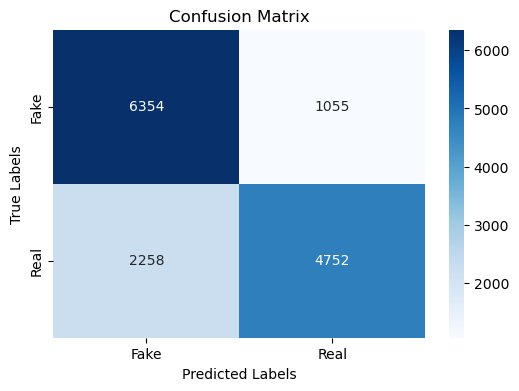

In [30]:
from collections import Counter

# Map cluster labels to true labels
def map_clusters_to_labels(y_true, y_clusters):
    labels = np.unique(y_clusters)
    label_mapping = {}
    for label in labels:
        indices = np.where(y_clusters == label)
        true_labels_in_cluster = y_true[indices]
        if len(true_labels_in_cluster) == 0:
            label_mapping[label] = 0  # Default label if cluster is empty
        else:
            most_common_label = Counter(true_labels_in_cluster).most_common(1)[0][0]
            label_mapping[label] = most_common_label
    return label_mapping

# Map cluster labels to true labels
label_mapping = map_clusters_to_labels(y_test.values, y_pred_clusters)
print(f"Cluster to label mapping: {label_mapping}")

# Apply the mapping to the predicted clusters
y_pred = np.array([label_mapping[label] for label in y_pred_clusters])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=1.0, average='binary')

print("Model performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization: Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [31]:
y_test

44395    1
53213    0
10100    1
48043    0
25213    0
        ..
54262    1
64845    0
39006    1
59591    0
29967    1
Name: label, Length: 14419, dtype: int64

In [32]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

## SVM + Word2Vec fake news detection

In [1]:
# Install necessary libraries
# !pip install pandas nltk scikit-learn matplotlib seaborn gensim graphviz

import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np
import graphviz
from sklearn.tree import export_graphviz

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data and drop rows with NaN values
# data = pd.read_csv('/content/fake_news.csv', sep=',', on_bad_lines='skip', quoting=3, low_memory=False)
data = pd.read_csv('WELFake_Dataset.csv')
data.dropna(subset=['text', 'label'], inplace=True)
print("Data loaded and cleaned. Remaining NaN values:")
print(data.isnull().sum())

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        words = [word for word in text.split() if word not in stop_words]
        return words
    else:
        return []

# Preprocess the data
print("Starting data preprocessing...")
data['cleaned_text'] = data['text'].apply(preprocess_text)
print("Data preprocessing completed.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.2, random_state=42
)

# Train the Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec model training completed.")

# Convert text to the average Word2Vec vector
def text_to_vector(text):
    vectors = [w2v_model.wv[word] for word in text if word in w2v_model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

X_train_vect = np.array([text_to_vector(text) for text in X_train])
X_test_vect = np.array([text_to_vector(text) for text in X_test])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fzhu77/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data loaded and cleaned. Remaining NaN values:
Unnamed: 0      0
title         558
text            0
label           0
dtype: int64
Starting data preprocessing...
Data preprocessing completed.
Training Word2Vec model...
Word2Vec model training completed.


Training the SVM model with Word2Vec features...
Model training completed.
Evaluating model performance with SVM...
SVM Model performance:
Accuracy: 0.9318954157708579
Precision: 0.9365575329438935
Recall: 0.9304899446618977
F1 Score: 0.9335138794854435
Generating confusion matrix for SVM...


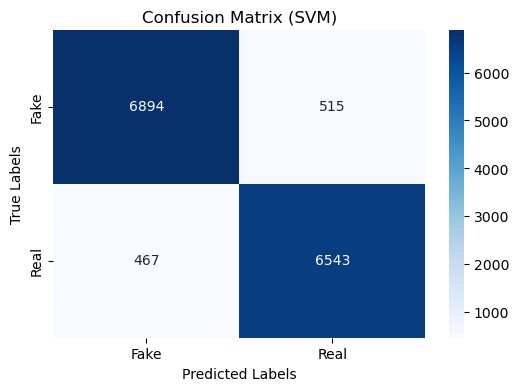

In [2]:
from sklearn.svm import SVC

# Train the SVM model
print("Training the SVM model with Word2Vec features...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vect, y_train)
print("Model training completed.")

# Predict and calculate performance metrics
print("Evaluating model performance with SVM...")
y_pred = svm_model.predict(X_test_vect)

# Assuming 1 represents "fake" and 0 represents "real"
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=1.0, average='binary')

print("SVM Model performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization: Confusion Matrix
print("Generating confusion matrix for SVM...")
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM)")
plt.show()


In [34]:
conf_matrix

array([[6896,  513],
       [ 449, 6561]])

In [ ]:
conf_matrix

## SVM + TF fake news detection

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fzhu77/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data loaded and cleaned. Remaining NaN values:
Unnamed: 0      0
title         558
text            0
label           0
dtype: int64
Starting data preprocessing...
Data preprocessing completed.
Transforming text data into TF features with limited vocabulary...
Transformation completed.
Training the LinearSVC model with TF features...
Model training completed.
Evaluating model performance...
Model performance:
Accuracy: 0.7958943061238644
Precision: 0.7657068062827225
Recall: 0.8685382642731813
F1 Score: 0.8138873079112123
Generating confusion matrix...


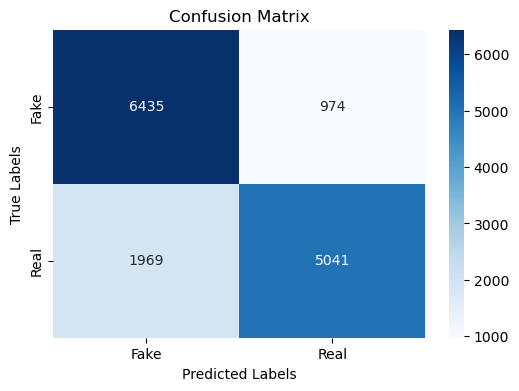

In [3]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data and drop rows with NaN values
data = pd.read_csv('WELFake_Dataset.csv')
data.dropna(subset=['text', 'label'], inplace=True)
print("Data loaded and cleaned. Remaining NaN values:")
print(data.isnull().sum())

# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        words = [word for word in text.split() if word not in stop_words]
        return ' '.join(words)  # Return a string
    else:
        return ''

# Preprocess the data
print("Starting data preprocessing...")
data['cleaned_text'] = data['text'].apply(preprocess_text)
print("Data preprocessing completed.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.2, random_state=42
)

# Initialize the CountVectorizer with limited vocabulary
vectorizer = CountVectorizer(max_features=50)

# Fit and transform the training data, transform the test data
print("Transforming text data into TF features with limited vocabulary...")
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
print("Transformation completed.")

# Train the LinearSVC model
print("Training the LinearSVC model with TF features...")
linear_svc_model = LinearSVC(random_state=42, max_iter=10000)
linear_svc_model.fit(X_train_vect, y_train)
print("Model training completed.")

# Predict and calculate performance metrics
print("Evaluating model performance...")
y_pred = linear_svc_model.predict(X_test_vect)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=1.0, average='binary')

print("Model performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization: Confusion Matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
